# Data Mining and Visualization Final Project
Authors: Bradley Schoeneweis, Hau Ha, Minh Nguyen

## Table of Contents

1. [Background](#background)
2. [Data Preprocessing](#preprocessing)
    1. [Importing the Libraries](#import)
    2. [Ingest the Dataset](#ingest)
    3. [Exploring the Dataset](#explore)
    4. [Splitting the Data](#split-data)

3. [Multiple Linear Regression](#linear-regression)
    1. [Building the Model](#build-linreg)
    2. [Visualizing the Results](#visualize-linreg)
    3. [Root Mean Squared Error](#rmse-linreg)
    4. [Performing Backwards Elimination](#back-elim)
    5. [Visualizing the Optimized Results](#vis-opt-linreg)
    6. [Root Mean Squared Error](#rmse-opt-linreg)

4. [Support Vector Regression](#svr)
    1. [Feature Scaling](#feature-scale-svr)
    2. [Building the Model](#fit-svr)
    3. [Visualizing the Results](#vis-svr)
    4. [Root Mean Squared Error](#rmse-svr)

5. [Decision Tree Regression](#dtr)
    1. [Building the Model](#fit-dtr)
    2. [Visualizing the Results](#vis-dtr)
    3. [Root Mean Squared Error](#rmse-dtr)
    
6. [Random Forest Regression](#rfr)
    1. [Building the Model](#fit-rfr)
    2. [Visualizing the Results](#vis-rfr)
    3. [Root Mean Squared Error](#rmse-rfr)
    
7. [Comparing the Regression Models](#compare)
    1. [Visualization of RMSEs](#vis-compare)
    2. [Summary](#summary)

## Background <a name="background"></a>

The premise of this project is to compare various regression models and their accuracy when applied to a dataset.

Our dataset is used to predict Graduate Admissions (from an Indian Perspective) and can be found [here](https://www.kaggle.com/mohansacharya/graduate-admissions/data#Admission_Predict_Ver1.1.csv).

Before preprocessing the dataset, here is a list of columns found in the CSV:
- Serial Number: An arbitrary id assigned to each row.
- GRE Score: Standardized graduate school test score (out of 340).
- TOEFL Score: Test of English as a Foreign Language score (out of 120).
- University Rating: Tier level of Undergraduate University (out of 5).
- SOP: Statement of Purpose strength (out of 5).
- LOR: Letter of Recommendation strength (out of 5).
- CGPA: Undergraduate GPA (out of 10).
- Research: Previous research experience (0 or 1).
- Chance of Admit: Admission probability (between 0 and 1).

## Data Preprocessing <a name="preprocessing"></a>

### Importing the Libraries <a name="import"></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Ingest the Dataset <a name="ingest"></a>

In [27]:
dataset = pd.read_csv('data/Admission.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

### Exploring the Dataset <a name="explore"></a>

In [28]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [29]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Splitting the Dataset <a name="split-data"></a>

We will split the dataset into a training set (75%) and a test set (25%).

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

## Multiple Linear Regression <a name="linear-regression"></a>

### Building the Model <a name="build-linreg"></a>

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Visualizing the Results <a name="visualize-linreg"></a>

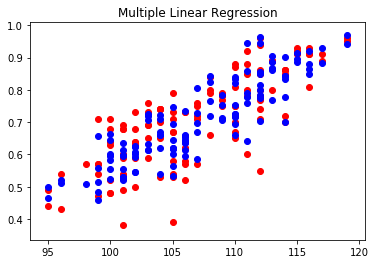

In [32]:
y_pred = regressor.predict(X_test)
plt.scatter(X_test[:, 1], y_test, color='red')
plt.scatter(X_test[:, 1], y_pred, color='blue')
plt.title('Multiple Linear Regression')
plt.show() 

### Root Mean Squared Error <a name="rmse-linreg"></a>

In [33]:
from sklearn.metrics import mean_squared_error
rmse_linreg = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_linreg

0.061809456162017516

### Performing Backwards Elimination <a name="back-elim"></a>
We want to find the optimal Multiple Linear Regression Model, so we'll find the "significant" parameters.

In [34]:
import statsmodels.api as sm

# Add b0
X_bias = np.append(arr=np.ones((500,1)), values=X, axis=1)

# Resplit with bias
X_train_bias, X_test_bias, y_train_bias, y_test_bias = train_test_split(
    X_bias, y, test_size=0.25, random_state=0)

X_opt_train = X_train_bias[:, [0, 1, 2, 5, 6, 7]]
X_opt_test = X_test_bias[:, [0, 1, 2, 5, 6, 7]]
regressor_OLS = sm.OLS(endog=y_train_bias, exog=X_opt_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     353.4
Date:                Wed, 04 Dec 2019   Prob (F-statistic):          2.95e-138
Time:                        22:55:28   Log-Likelihood:                 529.29
No. Observations:                 375   AIC:                            -1047.
Df Residuals:                     369   BIC:                            -1023.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4135      0.112    -12.651      0.000      -1.633      -1.194
x1             0.0023      0.001      3.940      0.000       0.001       0.003
x2             0.0029      0.001      3.001      0.003       0.001       0.005
x3             0.0214      0.004      4.981      0.000       0.013       0.030
x4             0.1186      0.011     11.060      0.000       0.097       0.140
x5             0.0237      0.007      3.199      0.001       0.009       0.038
==============================================================================
Omnibus:                       84.463   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.118
Skew:                          -1.123   Prob(JB):                     2.59e-43
Kurtosis:                       5.739   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualizing the Optimized Results <a name="vis-opt-linreg"></a>

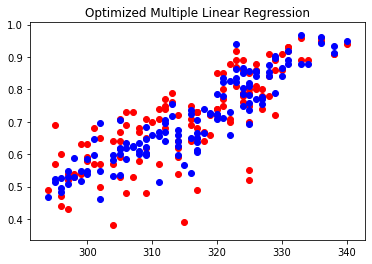

In [35]:
y_pred = regressor_OLS.predict(X_opt_test)
plt.scatter(X_test_bias[:, 1], y_test_bias, color='red')
plt.scatter(X_test_bias[:, 1], y_pred, color='blue')
plt.title('Optimized Multiple Linear Regression')
plt.show() 

### Root Mean Squared Error <a name="rmse-opt-linreg"></a>

In [36]:
rmse_linreg_opt = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_linreg_opt

0.06211685451112068

## Support Vector Regression <a name="svr"></a>

### Feature Scaling <a name="feature-scale-svr"></a>
We need to perform feature scaling for SVR.

In [37]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_scaled_train = sc_X.fit_transform(X_train)
X_scaled_test = sc_X.fit_transform(X_test)


### Building the Model <a name="fit-svr"></a>

In [38]:
from sklearn.svm import SVR
regressor_svr = SVR(kernel='rbf')
regressor_svr.fit(X_scaled_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

### Visualizing the Results <a name="vis-svr"></a>

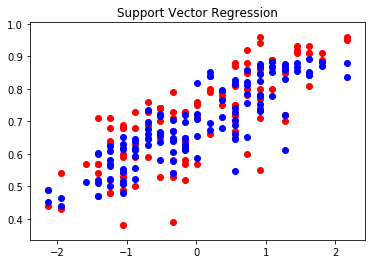

In [39]:
y_pred = regressor_svr.predict(X_scaled_test)
plt.scatter(X_scaled_test[:, 1], y_test, color='red')
plt.scatter(X_scaled_test[:, 1], y_pred, color='blue')
plt.title('Support Vector Regression')
plt.show()

### Root Mean Squared Error <a name="rmse-svr"></a>

In [40]:
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_svr

0.0723296716240283

## Decision Tree Regression <a name="dtr"></a>

### Building the Model <a name="fit-dtr"></a>

In [41]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state=0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

### Visualizing the Results <a name="vis-dtr"></a>

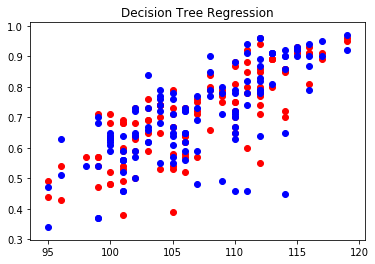

In [42]:
y_pred = regressor_dt.predict(X_test)
plt.scatter(X_test[:, 1], y_test, color='red')
plt.scatter(X_test[:, 1], y_pred, color='blue')
plt.title('Decision Tree Regression')
plt.show()

### Root Mean Squared Error <a name="rmse-dtr"></a>

In [43]:
rmse_dtr = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_dtr

0.0864314757481324

## Random Forest Regression <a name="rfr"></a>

### Building the Model <a name="fit-rfr"></a>

In [44]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators=100,
                                     max_leaf_nodes=5,
                                     random_state=0)
regressor_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=5,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

### Visualizing the Results <a name="vis-rfr"></a>

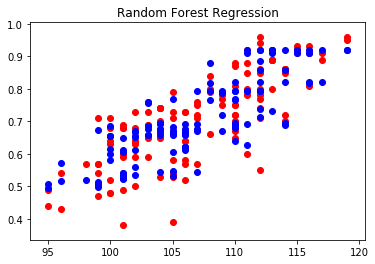

In [45]:
y_pred = regressor_rf.predict(X_test)
plt.scatter(X_test[:, 1], y_test, color='red')
plt.scatter(X_test[:, 1], y_pred, color='blue')
plt.title('Random Forest Regression')
plt.show() 

### Root Mean Squared Error <a name="rmse-rfr"></a>

In [46]:
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_rfr

0.06518398240712608

## Comparing the Regression Models <a name="compare"></a>

### Visualization of Root Mean Squared Errors <a name="vis-compare"></a>

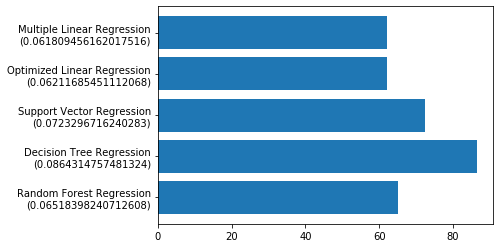

In [48]:
from collections import OrderedDict
data = OrderedDict()
data['Random Forest Regression\n(%s)' % rmse_rfr] = rmse_rfr
data['Decision Tree Regression\n(%s)' % rmse_dtr] = rmse_dtr
data['Support Vector Regression\n(%s)' % rmse_svr] = rmse_svr
data['Optimized Linear Regression\n(%s)' % rmse_linreg_opt] = rmse_linreg_opt
data['Multiple Linear Regression\n(%s)' % rmse_linreg] = rmse_linreg_opt

names = list(data.keys())
values = [x * 1000.0 for x in data.values()]
y_pos = np.arange(len(names))
plt.barh(y_pos, values) 
plt.yticks(y_pos, names)
plt.show()


### Summary <a name="summary"></a>